<a href="https://colab.research.google.com/github/Xavier-ML/Computational-Physics-with-Python/blob/main/07c_Multidimensional_heat_equation_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional differential equations

- Börge Göbel 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

## Heat equation

We solve the differential equations:

\begin{equation}
\frac{\partial}{\partial t} u(\vec{r},t) = a \Delta u(\vec{r},t)
\end{equation}

## In one dimension:

\begin{equation}
\frac{\partial}{\partial t} u(x,t) = a \frac{\partial^2}{\partial x^2} u(x,t)
\end{equation}

Here, \\( u(x,t) \\) is an array \\(\{ u_1, u_2, \dots, u_n \} \\) that has different values for different times. It describes the temperature. We can discretize the spatial derivative according to:

\begin{equation} 
\frac{\partial^2}{\partial x^2} u_j = \frac{u_{j+1}-2u_{j}+u_{j-1}}{(\Delta x)^2}
\end{equation}

For the edges we use double-forward or double-backward methods:

\begin{equation}
\frac{\partial^2}{\partial x^2} u_1 = \frac{u_{1}-2u_{2}+u_{3}}{(\Delta x)^2}\\
\frac{\partial^2}{\partial x^2} u_n = \frac{u_{n}-2u_{n-1}+u_{n-2}}{(\Delta x)^2}
\end{equation}

We can rewrite the heat equation as a set of coupled equation:

\begin{align}
\frac{\partial}{\partial t}u_1&=\frac{a}{(\Delta x)^2}\left(u_1-2u_2+u_3\right)\\
\frac{\partial}{\partial t}u_2&=\frac{a}{(\Delta x)^2}\left(u_1-2u_2+u_3\right)\\
\frac{\partial}{\partial t}u_3&=\frac{a}{(\Delta x)^2}\left(u_2-2u_3+u_4\right)\\ 
\vdots\\ 
\frac{\partial}{\partial t}u_j&=\frac{a}{(\Delta x)^2}\left(u_{j-1}-2u_j+u_{j+1}\right)\\ 
\vdots\\
\frac{\partial}{\partial t}u_{n-2}&=\frac{a}{(\Delta x)^2}\left(u_{n-3}-2u_{n-2}+u_{n-1}\right)\\
\frac{\partial}{\partial t}u_{n-1}&=\frac{a}{(\Delta x)^2}\left(u_{n-2}-2u_{n-1}+u_{n}\right)\\
\frac{\partial}{\partial t}u_n&=\frac{a}{(\Delta x)^2}\left(u_{n-2}-2u_{n-1}+u_{n}\right)
\end{align}

Alternatively, we can also keep the temperature at the edges constant and consider these to be (part of) the constant heat bath:

\begin{equation}
 u_1 = \mathrm{const.}\\ u_n = \mathrm{const.} \end{equation}


In [33]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [47]:
# Testing
u = np.array([1,4,9,16,25])
unew = np.zeros(5)
unew[1:-1] = u[2:] -2*u[1:-1] + u[:-2]

In [48]:
u[:-2]

array([1, 4, 9])

In [49]:
a = 1.0
dx = 1.0

def f_1D(t,u):
    unew = np.zeros(len(u))
    unew[1:-1] = u[2:] - 2*u[1:-1] + u[:-2]
    return unew * a/dx**2

In [53]:
tStart = 0
tEnd = 5000

size = 100
u0 = np.zeros([size])
u0[0] = 1

solution = integrate.solve_ivp(f_1D, [tStart, tEnd], u0, method = 'RK45', t_eval = np.linspace(tStart,tEnd,10001))

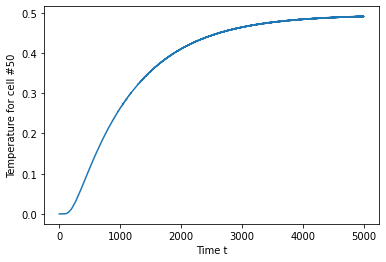

In [54]:
index = size//2

plt.xlabel("Time t")
plt.ylabel("Temperature for cell #" + str(index))

plt.plot(solution.t, solution.y[size//2])

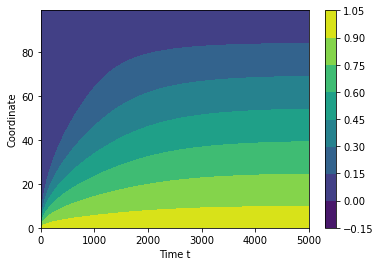

In [57]:
t_list, x_list = np.meshgrid(solution.t, np.arange(size))

plt.xlabel("Time t")
plt.ylabel("Coordinate")

plt.contourf(t_list, x_list, solution.y)
plt.colorbar()

### Other starting parameters

In [61]:
tStart = 0
tEnd = 2000

size = 100
u0 = np.zeros([size])
u0[0] = 1
u0[-1] = 1

solution = integrate.solve_ivp(f_1D, [tStart, tEnd], u0, method = 'RK45', t_eval = np.linspace(tStart,tEnd,10001))

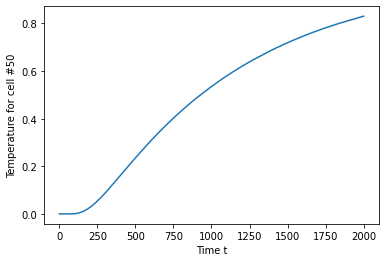

In [62]:
index = size//2

plt.xlabel("Time t")
plt.ylabel("Temperature for cell #" + str(index))

plt.plot(solution.t, solution.y[size//2])

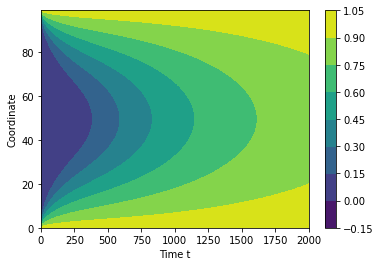

In [63]:
t_list, x_list = np.meshgrid(solution.t, np.arange(size))

plt.xlabel("Time t")
plt.ylabel("Coordinate")

plt.contourf(t_list, x_list, solution.y)
plt.colorbar()

## In 2 dimensions

\begin{equation}  
\frac{\partial}{\partial t} u(\vec{r},t) = a \left(\frac{\partial^2}{\partial x^2} u(\vec{r},t) + \frac{\partial^2}{\partial y^2} u(\vec{r},t)\right)
\end{equation}

Here, \\( u(\vec{r},t) \\) is an array \\(\{ u_{1,1}, u_{1,2}, \dots, u_{n,n} \} \\) that has different values for different times. We can discretize the spatial derivative according to:

\begin{equation} 
\frac{\partial^2}{\partial x^2} u_{i,j} + \frac{\partial^2}{\partial y^2} u_{i,j} = \frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{(\Delta x)^2}+\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{(\Delta y)^2}
\end{equation}

### Different starting conditions